## Reinforcement Learning

Reinforcement Learning is the class of machine learning which is based on learning from experience. Given an environment and an agent learning from the environment, the agent learns based on experience in the form of rewards and tries to reach the goal with an optimal solution. The ultimate aim is to maximize rewards.

### Elements of Reinforcement Learning

1. Policy- This describes the agents way of behaving, e.g. Lookup tables, extensive search methods.
2. Reward signal- Reward signal defines whether each reward received after each step is a good or a bad reward.
3. Value function- Value functions define better rewards for the long run.
4. Model of the environment(optional)- This gives inferences about how environment will behave.

The aim of a reinforcement learning problem is to find an optimal policy using the following approximations-
1. Value function- The value of a state under a policy, v(s) is given by the expected return when starting in state s and following the given policy.
2. Action-Value function- The value of taking action a in state s under a policy, q(s,a) is given by the expected return when starting from state s, taking action a and following the given policy.

## Temporal Difference Learning Method

This learning method is based on learning after each step. It does estimations at the end of each step. It does not require model of the environment and probability distribution of rewards. It is further divided into two learning methods based on the learning policy- Q Learning method(off policy) and SARSA method(on policy).

## Problem

Below is an implementation of a simple maze using SARSA learning model from the book 'Reinforcement Learning:An Introduction' by Sutton and Barto. The maze consists of a start postion, a goal and few obstacles in between. The agents job is to learn the maze and try the reach the goal with an optimal path. The agent learns from rewards received at each step. For each step taken in the maze, the agent receives a -1 reward, for each obstacle it receives -2 reward and the goal it receives +100 reward.

The maze can be of any size but as we make it more big, the model can take time to learn.

In [24]:
import pygame
import numpy as np
import sys
import matplotlib.pyplot as plt
import time

In [25]:
def create_maze(dim, num_of_walls):
    # Define the maze
    maze = np.zeros((dim,dim))

    #Select random walls
    for i in range(num_of_walls):
        a,b = np.random.random_integers(0,dim-1,2)
        maze[a,b] = 1

    # Define the goal state
    maze[dim-1, dim-1] = 2
    goal_state = (dim-1, dim-1)
    return maze, goal_state

In [26]:
# Define the actions and their corresponding changes in position
actions = ['up', 'down', 'left', 'right']
action_deltas = [(-1, 0), (1, 0), (0, -1), (0, 1)]

In [27]:
# Define the rewards for each state
rewards = {
    0: -1,   # Maze cell
    1: -2,   # Wall
    2: 100    # Goal
}

#### To choose next action, we have used epsilon greedy method

In [28]:
# Define a function to choose an action using the epsilon-greedy policy
def choose_action(state, epsilon):
    if np.random.random() < epsilon:
        # Choose a random action
        return actions[np.random.randint(0, len(actions))]
    else:
        # Choose the action with the highest Q-value
        return actions[np.argmax(Q[state[0], state[1]])]

#### The update the Action Value function Q, we have used SARSA method.

In [29]:
# Define a function to update the Q-value using SARSA
def update_q_value(state, action, reward, next_state, next_action, alpha, gamma):
    # Calculate the TD error
    td_error = reward + gamma * Q[next_state[0], next_state[1], actions.index(next_action)] - Q[state[0], state[1], actions.index(action)]
    
    # Update the Q-value for the current state and action
    Q[state[0], state[1], actions.index(action)] += alpha * td_error

In [30]:
#Define the colors to use
BLACK = (0, 0, 0)
WHITE = (255, 255, 255)
RED = (255, 0, 0)
GREEN = (0, 255, 0)
BLUE = (0, 0, 255)
YELLOW = (255,255,0)

In [31]:
# Define a function to simulate an episode
def run_episode(alpha, gamma, epsilon, training=True):
    # Choose a random starting state that is not the goal state
    state = (np.random.randint(0, maze.shape[0]), np.random.randint(0, maze.shape[1]))

    while state == goal_state:
        state = (np.random.randint(0, maze.shape[0]), np.random.randint(0, maze.shape[1]))
    
    init = state
    
    if training == False:
        # Clear the screen
        screen.fill(WHITE)

        # Draw the maze and the goal
        for i in range(maze.shape[0]):
            for j in range(maze.shape[1]):
                rect = pygame.Rect(j*cell_size, i*cell_size, cell_size, cell_size)
                if i == init[0] and j == init[1]: #Start cell
                    pygame.draw.rect(screen, YELLOW, rect)
                    pygame.draw.circle(screen, RED, (state[1]*cell_size+25,state[0]*cell_size+25), 5)
                elif maze[i,j] == 0:  # Maze cell
                    pygame.draw.rect(screen, BLACK, rect)
                elif maze[i,j] == 1:  #Wall
                    pygame.draw.rect(screen, BLUE, rect)
                elif maze[i,j] == 2: #Goal
                    pygame.draw.rect(screen, GREEN, rect)
    
    # Choose the first action using an epsilon-greedy policy
    action = choose_action(state, epsilon)
    
    # Initialize the total reward
    total_reward = 0
    
    # Repeat until the goal state is reached
    while state != goal_state:
        # Move to the next state
        delta = action_deltas[actions.index(action)]
        next_state = (state[0]+delta[0], state[1]+delta[1])
        
        # If the next state is outside the maze, set it to the current state
        if next_state[0] < 0 or next_state[0] >= maze.shape[0] or next_state[1] < 0 or next_state[1] >= maze.shape[1]:
            next_state = state
            # Update reward as the action taken hit the border of the wall
            total_reward += rewards[1]
        
        # Get the reward for the next state
        reward = rewards[maze[next_state[0], next_state[1]]]
    
        # Update the Q-value using SARSA
        next_action = choose_action(next_state, epsilon)
        if training == True:
            update_q_value(state, action, reward, next_state, next_action, alpha, gamma)

        # Update the total reward and current state and action
        total_reward += reward
        state = next_state
        action = next_action
        
        if training == False:
            # Draw the current state of the agent
            for i in range(maze.shape[0]):
                for j in range(maze.shape[1]):
                    if i == state[0] and j == state[1]: #Next cell
                        pygame.draw.circle(screen, RED, (state[1]*cell_size+25,state[0]*cell_size+25), 5)

    return total_reward

### Train a 5X5 maze

First, we will train a 5X5 maze by running 100 episodes for the agent to learn and update the policy based on SARSA method.

In [9]:
# Train the agent for the specified number of episodes
alpha = 0.5
gamma = 0.9
epsilon = 0.2

# Create Maze
maze, goal_state = create_maze(dim=5, num_of_walls=10)

# Initialize the Q-matrix with zeros
Q = np.zeros((maze.shape[0], maze.shape[1], 4))

for i in range(100):
    total_reward = run_episode(alpha, gamma, epsilon)
    
    # Print the total reward for the episode
    print(f"Episode {i+1}: Total Reward = {total_reward}")

Episode 1: Total Reward = -167
Episode 2: Total Reward = 89
Episode 3: Total Reward = 91
Episode 4: Total Reward = 98
Episode 5: Total Reward = 72
Episode 6: Total Reward = 94
Episode 7: Total Reward = 75
Episode 8: Total Reward = 98
Episode 9: Total Reward = 56
Episode 10: Total Reward = 97
Episode 11: Total Reward = 52
Episode 12: Total Reward = 98
Episode 13: Total Reward = 87
Episode 14: Total Reward = 71
Episode 15: Total Reward = 98
Episode 16: Total Reward = 95
Episode 17: Total Reward = 95
Episode 18: Total Reward = 97
Episode 19: Total Reward = 94
Episode 20: Total Reward = 98
Episode 21: Total Reward = 81
Episode 22: Total Reward = 100
Episode 23: Total Reward = 93
Episode 24: Total Reward = 91
Episode 25: Total Reward = 99
Episode 26: Total Reward = 97
Episode 27: Total Reward = 98
Episode 28: Total Reward = 88
Episode 29: Total Reward = 98
Episode 30: Total Reward = 98
Episode 31: Total Reward = 99
Episode 32: Total Reward = 86
Episode 33: Total Reward = 89
Episode 34: Tota

<ipython-input-2-03d4055901fc>:7: DeprecationWarning: This function is deprecated. Please call randint(0, 4 + 1) instead
  a,b = np.random.random_integers(0,dim-1,2)


### Test the agent

To test the agent, we have run 10 episodes. While testing, we are not updating the Q function. We are testing the agent based on the Q function generated while training. To visualize the maze, we have used Pygame package.

In [10]:
#Initialize Pygame
pygame.init()

#Define the size of each cell in the maze and the size of the window
cell_size = 50
window_size = (maze.shape[1]*cell_size, maze.shape[0]*cell_size)

#Create the window
screen = pygame.display.set_mode(window_size)
pygame.display.set_caption("Maze")
clock = pygame.time.Clock()

# Test the agent for the specified number of episodes
for i in range(10):
    total_reward = run_episode(alpha, gamma, epsilon, training=False)
    
    # Print the total reward for the episode
    print(f"Episode {i+1}: Total Reward = {total_reward}")
    
    # Update the Pygame window
    pygame.display.flip()
    
    # Pause briefly to allow the user to see the visualization
    pygame.time.wait(3000)

# Wait for the user to close the Pygame window
while True:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            pygame.quit()
            sys.exit()

Episode 1: Total Reward = 92
Episode 2: Total Reward = 98
Episode 3: Total Reward = 96
Episode 4: Total Reward = 97
Episode 5: Total Reward = 95
Episode 6: Total Reward = 99
Episode 7: Total Reward = 77
Episode 8: Total Reward = 30
Episode 9: Total Reward = 90
Episode 10: Total Reward = 95


SystemExit: 

C:\Users\aditi\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3445: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


## Parameters VS Performance tradeoff 

To train the model in an optimal manner, we have discussed here some tradeoffs that can be considered while training the learning of the agent. We can play with hyperparameters alpha, gamma and apsilon and find out that which parameter will give us an optimal model by converging to maximum Q value faster. Here we have also considered the time constraint with each training. So the idea is to not only find optimal parameters but also to find parameters which won't slow down the learning.

The hyperparameters considered in the learning are-
1. Alpha(learning rate)
2. Gamma(discount rate)
3. Epsilon(eploration vs exploitation rate)

<ipython-input-25-03d4055901fc>:7: DeprecationWarning: This function is deprecated. Please call randint(0, 4 + 1) instead
  a,b = np.random.random_integers(0,dim-1,2)


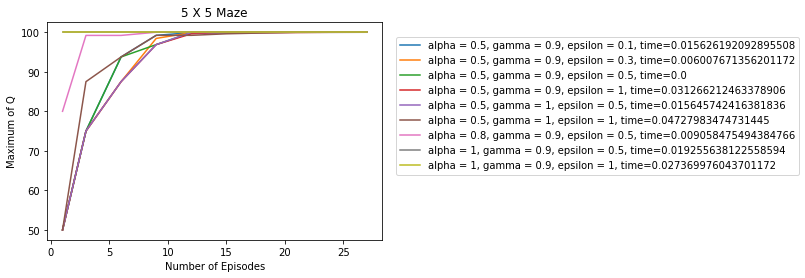

In [32]:
#For 5X5 maze

maze, goal_state = create_maze(5,10)

num_of_episodes = np.arange(0,30,3)
num_of_episodes[0] = 1
max_Q = np.zeros(len(num_of_episodes), dtype=float)

alpha = [0.5,0.5,0.5,0.5,0.5,0.5,0.8,1,1]
gamma = [0.9,0.9,0.9,0.9,1,1,0.9,0.9,0.9]
epsilon = [0.1,0.3,0.5,1,0.5,1,0.5,0.5,1]

plt.figure()
for m in range(len(alpha)):
    for i in range(len(num_of_episodes)):
        start = time.time()
        # Initialize the Q-matrix with zeros
        Q = np.zeros((maze.shape[0], maze.shape[1], 4))

        # Train the agent for the specified number of episodes
        for j in range(num_of_episodes[i]):
            _ = run_episode(alpha[m], gamma[m], epsilon[m], training=True)

        #Get maximum value of Q
        max_Q[i] = Q.max()
    plt.plot(num_of_episodes, max_Q, label = 'alpha = {}, gamma = {}, epsilon = {}, time={}'.format(alpha[m], gamma[m], epsilon[m], (time.time()-start)))

plt.legend(loc=(1.04,0.3))
plt.title('5 X 5 Maze')
plt.xlabel('Number of Episodes')
plt.ylabel('Maximum of Q')
plt.show()

<ipython-input-25-03d4055901fc>:7: DeprecationWarning: This function is deprecated. Please call randint(0, 9 + 1) instead
  a,b = np.random.random_integers(0,dim-1,2)


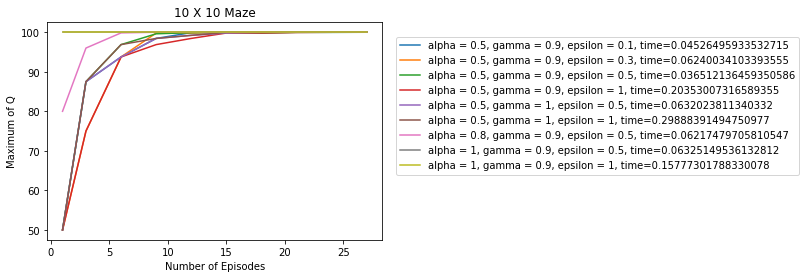

In [33]:
#For 10X10 maze
dim=10
maze, goal_state = create_maze(dim,15)
num_of_episodes = np.arange(0,30,3)
num_of_episodes[0] = 1
max_Q = np.zeros(len(num_of_episodes), dtype=float)

alpha = [0.5,0.5,0.5,0.5,0.5,0.5,0.8,1,1]
gamma = [0.9,0.9,0.9,0.9,1,1,0.9,0.9,0.9]
epsilon = [0.1,0.3,0.5,1,0.5,1,0.5,0.5,1]

plt.figure()
for m in range(len(alpha)):
    for i in range(len(num_of_episodes)):
        start = time.time()
        # Initialize the Q-matrix with zeros
        Q = np.zeros((maze.shape[0], maze.shape[1], 4))

        # Train the agent for the specified number of episodes
        for j in range(num_of_episodes[i]):
            _ = run_episode(alpha[m], gamma[m], epsilon[m], training=True)

        #Get maximum value of Q
        max_Q[i] = Q.max()
    plt.plot(num_of_episodes, max_Q, label = 'alpha = {}, gamma = {}, epsilon = {}, time={}'.format(alpha[m], gamma[m], epsilon[m], (time.time()-start)))

plt.legend(loc=(1.04,0.3))
plt.title('10 X 10 Maze')
plt.xlabel('Number of Episodes')
plt.ylabel('Maximum of Q')
plt.show()

<ipython-input-25-03d4055901fc>:7: DeprecationWarning: This function is deprecated. Please call randint(0, 19 + 1) instead
  a,b = np.random.random_integers(0,dim-1,2)


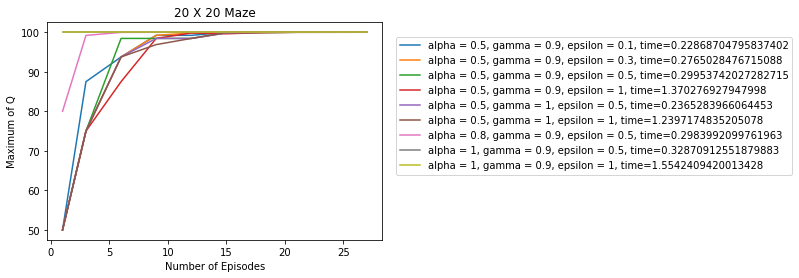

In [34]:
#For 20X20 maze
dim=20
maze, goal_state = create_maze(dim,30)
num_of_episodes = np.arange(0,30,3)
num_of_episodes[0] = 1
max_Q = np.zeros(len(num_of_episodes), dtype=float)

alpha = [0.5,0.5,0.5,0.5,0.5,0.5,0.8,1,1]
gamma = [0.9,0.9,0.9,0.9,1,1,0.9,0.9,0.9]
epsilon = [0.1,0.3,0.5,1,0.5,1,0.5,0.5,1]

plt.figure()
for m in range(len(alpha)):
    for i in range(len(num_of_episodes)):
        start=time.time()
        # Initialize the Q-matrix with zeros
        Q = np.zeros((maze.shape[0], maze.shape[1], 4))

        # Train the agent for the specified number of episodes
        for j in range(num_of_episodes[i]):
            _ = run_episode(alpha[m], gamma[m], epsilon[m], training=True)

        #Get maximum value of Q
        max_Q[i] = Q.max()
    plt.plot(num_of_episodes, max_Q, label = 'alpha = {}, gamma = {}, epsilon = {}, time={}'.format(alpha[m], gamma[m], epsilon[m], (time.time()-start)))

plt.legend(loc=(1.04,0.3))
plt.title('20 X 20 Maze')
plt.xlabel('Number of Episodes')
plt.ylabel('Maximum of Q')
plt.show()

### Comment

As can be seen from the above outputs, if we keep a higher learning rate alpha, then the model take time to learn and this can be a contention point when the training data is high or the model is very complex. Similarly, if we keep high epsilon, then the model will explore more and this can again lead to degrading performance if the model is complex or has high training data. Deciding the right alpha and epsilon to achieve optimal value faster without performance tradeoffs is the key to achieving a better learning model.

## Training with a one maze and Testing with another maze

In [14]:
#Training a 5X5 maze and testing the same policy for another maze
alpha = 0.5
gamma = 0.9
epsilon = 0.2

# Create Maze
maze, goal_state = create_maze(dim=5, num_of_walls=10)

# Initialize the Q-matrix with zeros
Q = np.zeros((maze.shape[0], maze.shape[1], 4))

for i in range(100):
    total_reward = run_episode(alpha, gamma, epsilon)


#Testing the maze with set policy

#Initialize Pygame
pygame.init()

#Define the size of each cell in the maze and the size of the window
cell_size = 50
window_size = (maze.shape[1]*cell_size, maze.shape[0]*cell_size)

#Create the window
screen = pygame.display.set_mode(window_size)
pygame.display.set_caption("Maze")
clock = pygame.time.Clock()

# Test the agent for the specified number of episodes
for i in range(10):
    total_reward = run_episode(alpha, gamma, epsilon, training=False)
    
    # Print the total reward for the episode
    print(f"Episode {i+1}: Total Reward = {total_reward}")
    
    # Update the Pygame window
    pygame.display.flip()
    
    # Pause briefly to allow the user to see the visualization
    pygame.time.wait(3000)

# Wait for the user to close the Pygame window
while True:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            pygame.quit()
            sys.exit()

<ipython-input-2-03d4055901fc>:7: DeprecationWarning: This function is deprecated. Please call randint(0, 4 + 1) instead
  a,b = np.random.random_integers(0,dim-1,2)


Episode 1: Total Reward = 91
Episode 2: Total Reward = 96
Episode 3: Total Reward = 87
Episode 4: Total Reward = 98
Episode 5: Total Reward = 96
Episode 6: Total Reward = 97
Episode 7: Total Reward = 97
Episode 8: Total Reward = 86
Episode 9: Total Reward = 89
Episode 10: Total Reward = 98


SystemExit: 

C:\Users\aditi\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3445: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [15]:
#Testing the updated maze with previous policy

# Update Maze
maze, goal_state = create_maze(dim=5, num_of_walls=10)

#Initialize Pygame
pygame.init()

#Define the size of each cell in the maze and the size of the window
cell_size = 50
window_size = (maze.shape[1]*cell_size, maze.shape[0]*cell_size)

#Create the window
screen = pygame.display.set_mode(window_size)
pygame.display.set_caption("Maze")
clock = pygame.time.Clock()

# Test the agent for the specified number of episodes
for i in range(10):
    total_reward = run_episode(alpha, gamma, epsilon, training=False)
    
    # Print the total reward for the episode
    print(f"Episode {i+1}: Total Reward = {total_reward}")
    
    # Update the Pygame window
    pygame.display.flip()
    
    # Pause briefly to allow the user to see the visualization
    pygame.time.wait(3000)

# Wait for the user to close the Pygame window
while True:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            pygame.quit()
            sys.exit()

<ipython-input-2-03d4055901fc>:7: DeprecationWarning: This function is deprecated. Please call randint(0, 4 + 1) instead
  a,b = np.random.random_integers(0,dim-1,2)


Episode 1: Total Reward = 90
Episode 2: Total Reward = 100
Episode 3: Total Reward = 95
Episode 4: Total Reward = 97
Episode 5: Total Reward = 98
Episode 6: Total Reward = 95
Episode 7: Total Reward = 92
Episode 8: Total Reward = 94
Episode 9: Total Reward = 97
Episode 10: Total Reward = 92


SystemExit: 